In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,claimmode_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,None,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0


In [6]:
WeaponTypesDF = gtdDF[['index1','weaptype1_txt']]
WeaponTypesDF.head()

,index1,weaptype1_txt
0,1.0,Firearms
1,2.0,Firearms
2,3.0,Firearms
3,4.0,Explosives/Bombs/Dynamite
4,5.0,Firearms


In [7]:
filterlist = ['Unknown','Other']
WeaponTypesFilterDF = WeaponTypesDF[~WeaponTypesDF['weaptype1_txt'].isin(filterlist)]
WeaponTypesFilterDF.head()

,index1,weaptype1_txt
0,1.0,Firearms
1,2.0,Firearms
2,3.0,Firearms
3,4.0,Explosives/Bombs/Dynamite
4,5.0,Firearms


In [8]:
WeaponTypes2DF = pd.get_dummies(WeaponTypesFilterDF)
WeaponTypes2DF.head()

,index1,weaptype1_txt_Biological,weaptype1_txt_Chemical,weaptype1_txt_Explosives/Bombs/Dynamite,weaptype1_txt_Fake Weapons,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Melee,weaptype1_txt_Radiological,weaptype1_txt_Sabotage Equipment,"weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,1.0,0,0,0,0,1,0,0,0,0,0
1,2.0,0,0,0,0,1,0,0,0,0,0
2,3.0,0,0,0,0,1,0,0,0,0,0
3,4.0,0,0,1,0,0,0,0,0,0,0
4,5.0,0,0,0,0,1,0,0,0,0,0


In [9]:
WeaponTypesMergeDF = result = pd.merge(WeaponTypes2DF,WeaponTypesFilterDF[['index1','weaptype1_txt']],on='index1')
WeaponTypesMergeDF.columns = WeaponTypesMergeDF.columns.str.replace('weaptype1_txt_', '')
WeaponTypesMergeDF.head()

,index1,Biological,Chemical,Explosives/Bombs/Dynamite,Fake Weapons,Firearms,Incendiary,Melee,Radiological,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",weaptype1_txt
0,1.0,0,0,0,0,1,0,0,0,0,0,Firearms
1,2.0,0,0,0,0,1,0,0,0,0,0,Firearms
2,3.0,0,0,0,0,1,0,0,0,0,0,Firearms
3,4.0,0,0,1,0,0,0,0,0,0,0,Explosives/Bombs/Dynamite
4,5.0,0,0,0,0,1,0,0,0,0,0,Firearms


In [10]:
# Assign X (data) and y (target)
data = WeaponTypesMergeDF.drop(["index1","weaptype1_txt",], axis=1)
target = WeaponTypesMergeDF["weaptype1_txt"]
feature_names = data.columns
print(data.shape, target.shape)

(87395, 10) (87395,)


In [11]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4928818269150228, 'Explosives/Bombs/Dynamite'),
 (0.36195458557838167, 'Firearms'),
 (0.09588529300383154, 'Incendiary'),
 (0.039080016409103364, 'Melee'),
 (0.004674744156726524, 'Chemical'),
 (0.0022591283296066744,
  'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
 (0.002157338722906221, 'Sabotage Equipment'),
 (0.0006257623027750052, 'Biological'),
 (0.0002519745867847813, 'Fake Weapons'),
 (0.00022932999486097532, 'Radiological')]

In [15]:
RFWeaponTypesDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), 
                               columns = ['Probability', 'Weapon Type'])
RFWeaponTypesDF
RFWeaponTop5DF = RFWeaponTypesDF.head(5)
RFWeaponTop5DF

,Probability,Weapon Type
0,0.492882,Explosives/Bombs/Dynamite
1,0.361955,Firearms
2,0.095885,Incendiary
3,0.039080,Melee
4,0.004675,Chemical


In [16]:
pies = RFWeaponTop5DF['Weapon Type']
pie_slices = RFWeaponTop5DF['Probability']
colors = ["lightskyblue","orange","pink","yellowgreen","lightcoral"]
          #,"silver"]
          #"yellow","lightgreen","wheat","khaki"]
explode = (0.1,0,0,0,0)
          #,0,0,0,0)

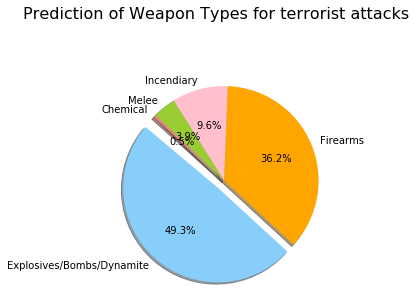

In [17]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML19_WeaponType_Attacks_Pie_RF")
plt.suptitle('Prediction of Weapon Types for terrorist attacks', size=16, y=1.12) 
plt.show()

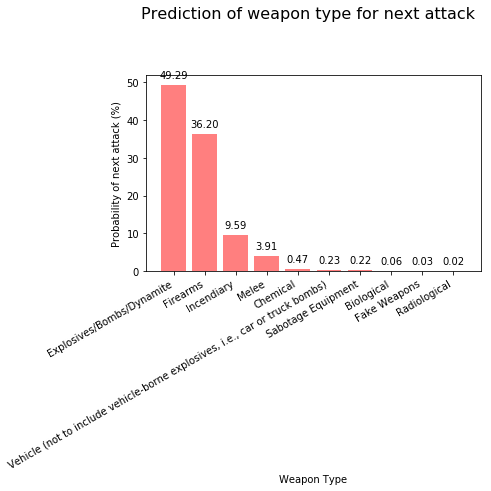

In [18]:
y_axis = RFWeaponTypesDF['Probability']*100
x_axis = RFWeaponTypesDF['Weapon Type']
fig, ax = plt.subplots()
# plot
ax.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# Labels for x and y axes
plt.xlabel("Weapon Type")
plt.ylabel("Probability of next attack (%)")

# Show the values of each probability on plot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML19_WeaponType_Attacks_Bar_RF")
# Title for the chart
plt.suptitle('Prediction of weapon type for next attack', size=16, y=1.12) 
plt.show()
